In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle

In [19]:
# import
# source : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.shape

(48895, 16)

In [7]:
# select cols

df = df[['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews']]
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9


In [8]:
# dummify columns

df = df.join(pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group'))
df = df.join(pd.get_dummies(df['neighbourhood'], prefix='neighbourhood'))
df = df.join(pd.get_dummies(df['room_type'], prefix='room_type'))
df = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)
df.head()

,name,latitude,longitude,price,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,40.64749,-73.97237,149,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Skylit Midtown Castle,40.75362,-73.98377,225,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.94190,150,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,270,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,9,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# train model

prediction_col = 'price'
ignore_cols = ['name', 'latitude', 'longitude']
features_cols = [c for c in df.columns if (c != prediction_col and c not in ignore_cols)]

X = df[features_cols]
y = df[prediction_col]

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [10]:
# export model

pickle.dump(model, open('model.pkl', 'wb'))

In [3]:
# tests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
np.histogram(df['price'], bins=20)

(array([47660,   937,   133,    55,    33,    24,    10,     8,     7,
            2,     8,     0,     3,     4,     0,     3,     1,     1,
            0,     6]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]))

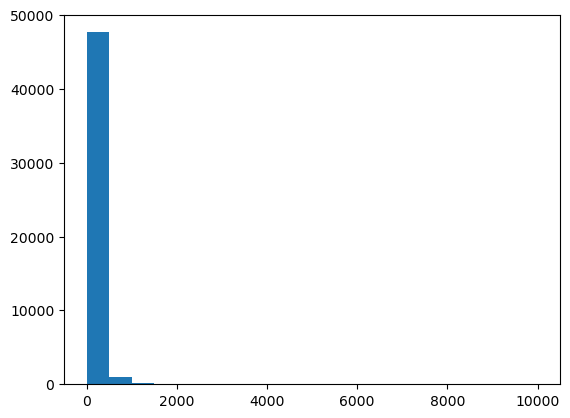

In [11]:
fig = plt.hist(df['price'], bins=20)

In [12]:
fig

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

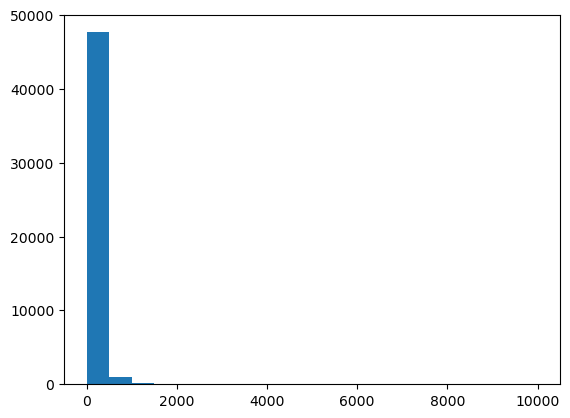

In [13]:
fig, ax = plt.subplots()
ax.hist(df['price'], bins=20)

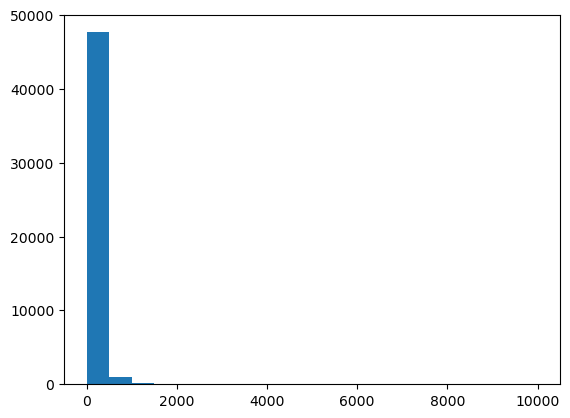

In [15]:
fig

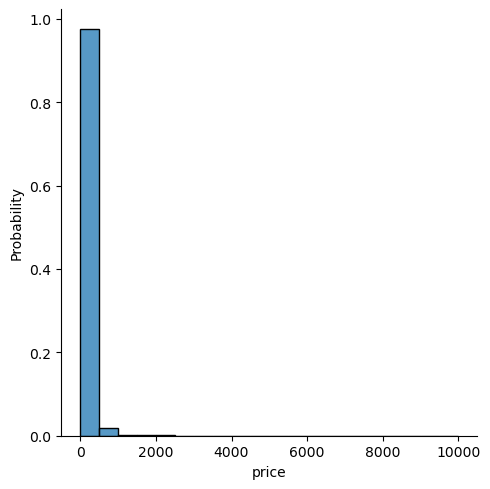

In [20]:
sns.displot(df['price'], stat='probability', bins=20)

In [12]:
df_sample = df.sample(frac=0.01)

In [15]:
fig = px.scatter_mapbox(df_sample, lat='latitude', lon='longitude', labels='labels')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [21]:
list(df['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [18]:
df

,name,latitude,longitude,price,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,40.64749,-73.97237,149,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Skylit Midtown Castle,40.75362,-73.98377,225,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.94190,150,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,270,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,9,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,40.67853,-73.94995,70,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48891,Affordable room in Bushwick/East Williamsburg,40.70184,-73.93317,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48892,Sunny Studio at Historical Neighborhood,40.81475,-73.94867,115,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48893,43rd St. Time Square-cozy single bed,40.75751,-73.99112,55,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
